# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing data

In [2]:
df = pd.read_csv('cubic_zirconia.csv')
df.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,984


In [3]:
df.rename(columns={ "Unnamed: 0" : "number" }, inplace = True)

In [15]:
df.head(2)

,number,carat,cut,color,clarity,depth,table,x,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,984


# Univariate analysis

In [4]:
df.shape

(26967, 9)

In [5]:
df.isnull().sum()

number       0
carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
price        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   number   26967 non-null  int64  
 1   carat    26967 non-null  float64
 2   cut      26967 non-null  object 
 3   color    26967 non-null  object 
 4   clarity  26967 non-null  object 
 5   depth    26270 non-null  float64
 6   table    26967 non-null  float64
 7   x        26967 non-null  float64
 8   price    26967 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
dups = df.duplicated()
dups.sum()

0

In [8]:
df = df.drop("number", axis = 1)

In [21]:
# details of only continous variables are given
df.describe()

,carat,depth,table,x,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.730488,3939.518115
std,0.477745,1.412860,2.232068,1.126897,4024.864666
min,0.200000,50.800000,49.000000,3.730000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,18818.000000


# Missing Value imputation

In [9]:
mean = df['depth'].mean()

In [10]:
df['depth'] = df['depth'].fillna(mean)

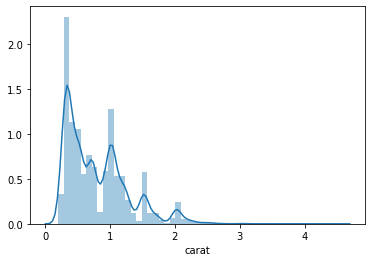

In [24]:
sns.distplot(df["carat"])

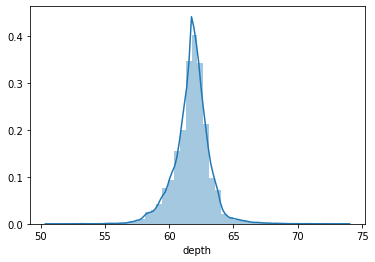

In [25]:
sns.distplot(df["depth"])

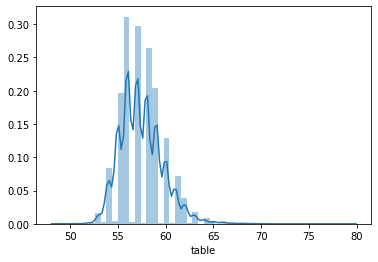

In [15]:
sns.distplot(df["table"])

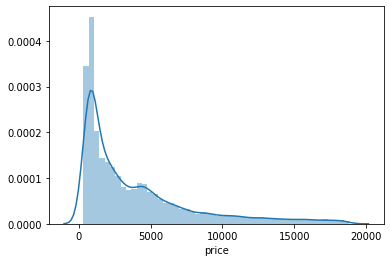

In [16]:
sns.distplot(df["price"])

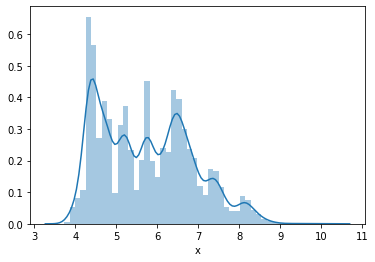

In [17]:
sns.distplot(df["x"])

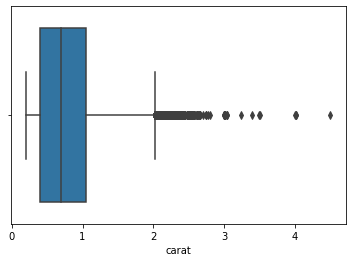

In [18]:
sns.boxplot(df["carat"])

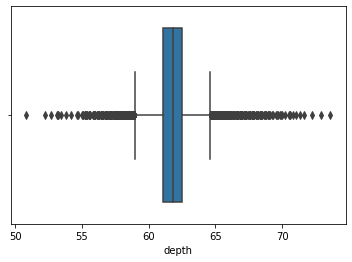

In [19]:
sns.boxplot(df["depth"])

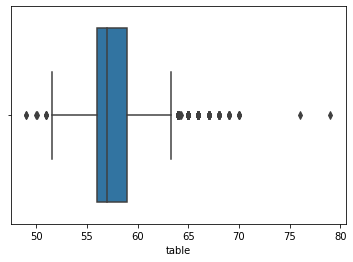

In [20]:
sns.boxplot(df["table"])

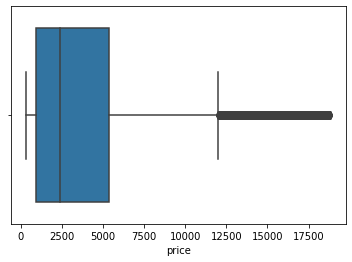

In [21]:
sns.boxplot(df["price"])

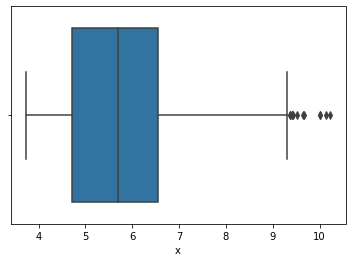

In [22]:
sns.boxplot(df["x"])

### There are many outliers in the data regards to countious variable

# Now converting categorical variable into continous variable ( Numeric Values)

## Used label encoding method

#### Here I have used label encoding becuase all the 3 categorical variables are oridinal( Oridinal variable are those which have a rank or ordered values). Here these variables cut, color and clarity have rank given 

#### For Cut - fair good perimum ideal is given
#### For Color - D is best and J is worst
#### For Clarity - level of flawless FL, I3 = level 3  FL , IF VVS

In [11]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'price'], dtype='object')

In [12]:
df['cut'] = pd.Categorical(df['cut']).codes

In [13]:
df['color'] = pd.Categorical(df['color']).codes

In [14]:
df['clarity'] = pd.Categorical(df['clarity']).codes

In [15]:
df.head()

,carat,cut,color,clarity,depth,table,x,price
0,0.30,2,1,2,62.1,58.0,4.27,499
1,0.33,3,3,1,60.8,58.0,4.42,984
2,0.90,4,1,7,62.2,60.0,6.04,6289
3,0.42,2,2,4,61.6,56.0,4.82,1082
4,0.31,2,2,6,60.4,59.0,4.35,779


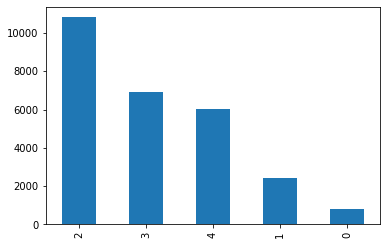

In [28]:
df.cut.value_counts().plot(kind= "bar")

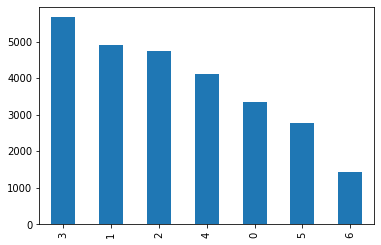

In [29]:
df.color.value_counts().plot(kind= "bar")

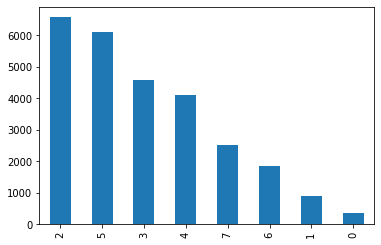

In [30]:
df.clarity.value_counts().plot(kind= "bar")

# Bivariate analysis

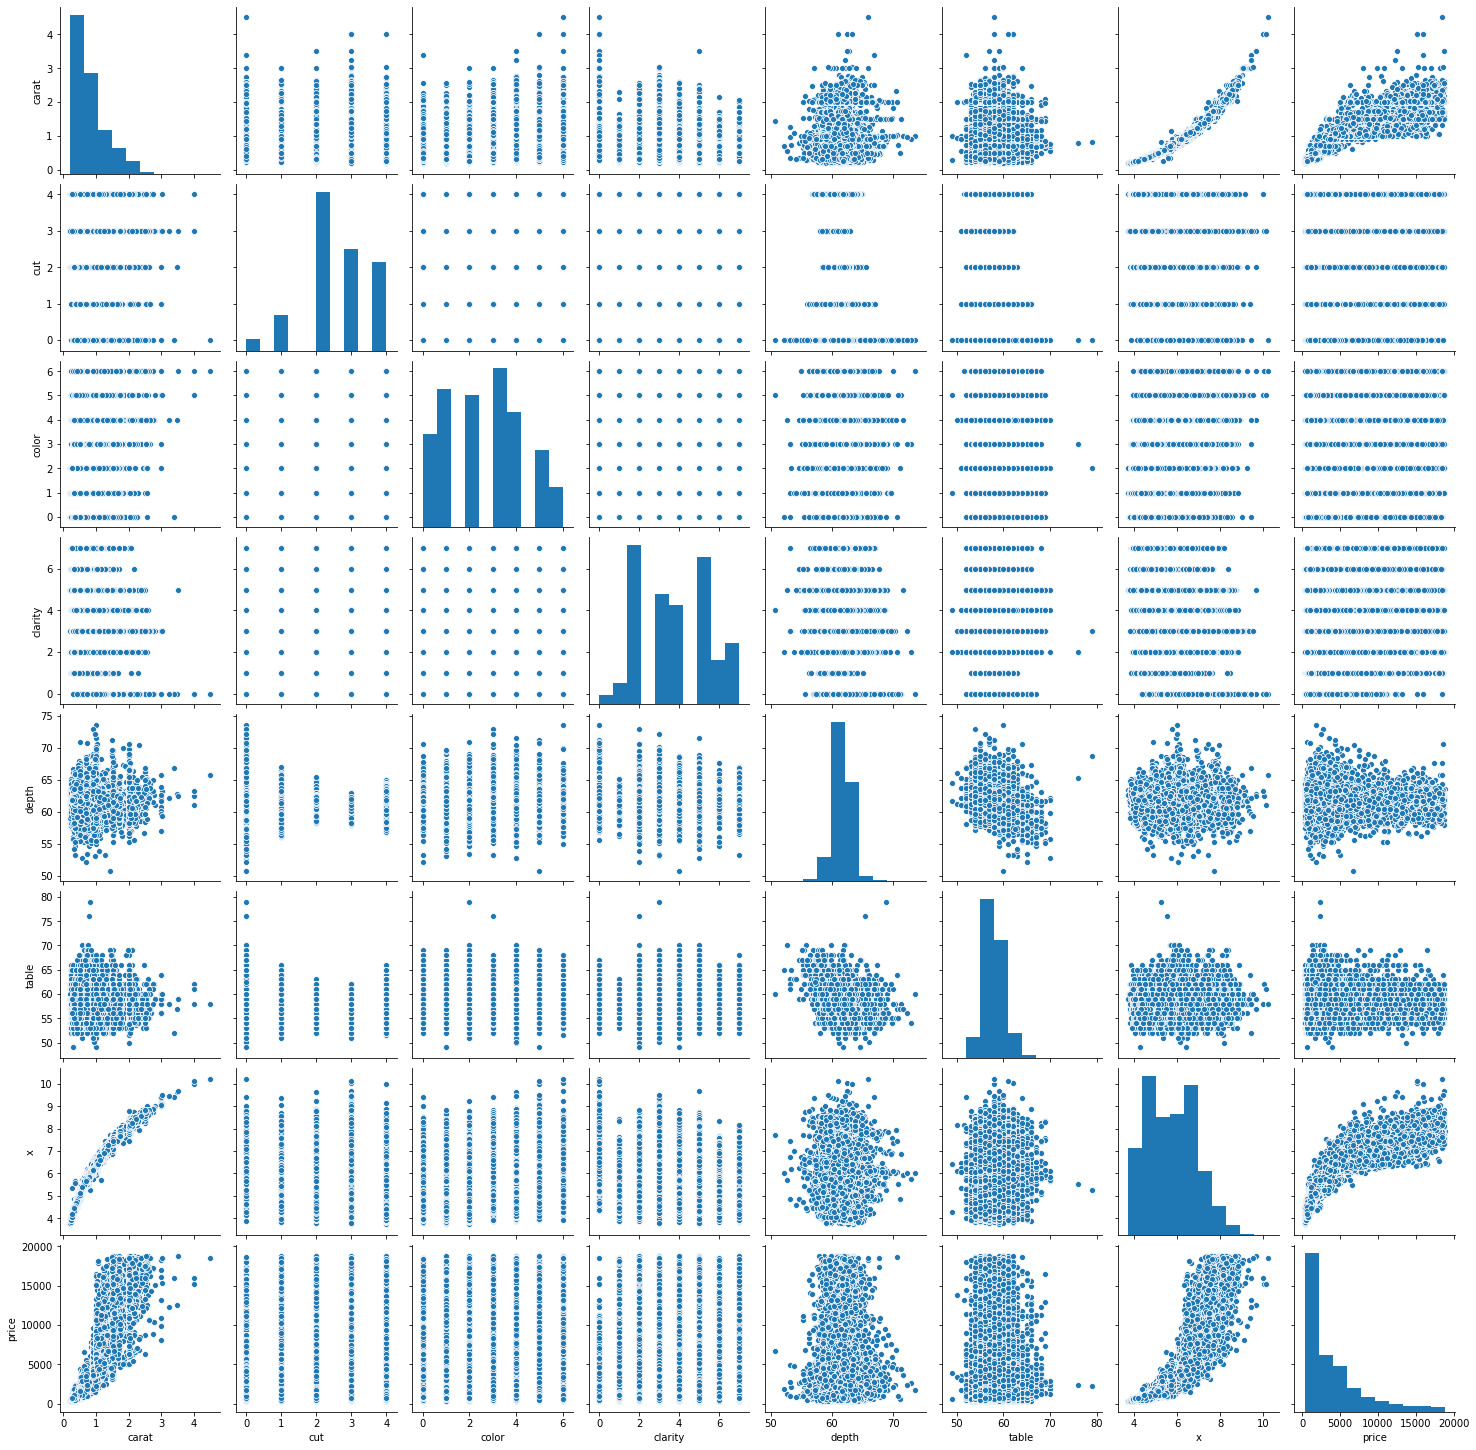

In [31]:
sns.pairplot(df)

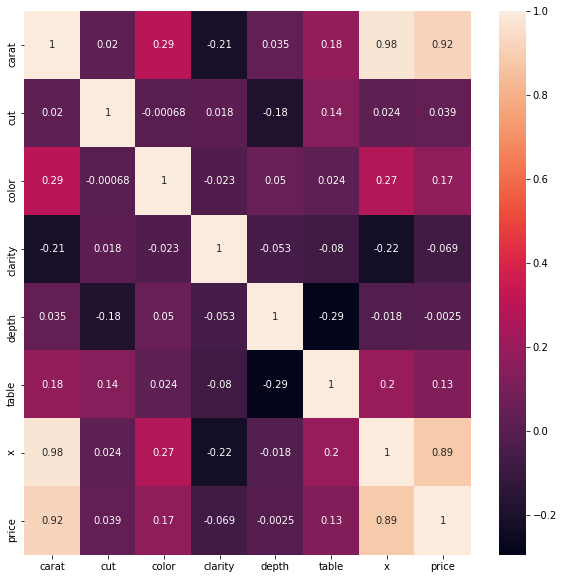

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

# Checking Outliers here

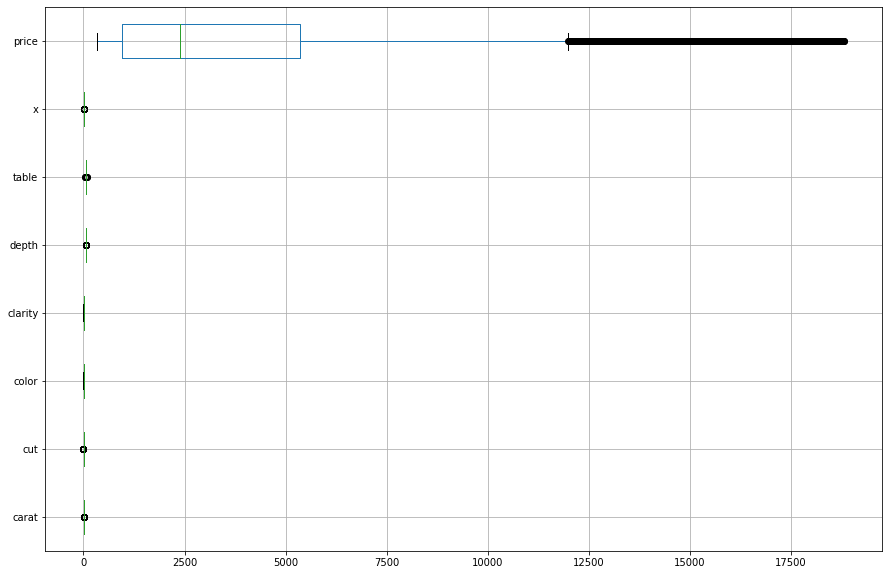

In [16]:
plt.figure(figsize =(15,10))
df.boxplot(vert=0)

In [34]:
# there are many outliers seen here in continous varibles

# Outliers Treatment

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [18]:
for column in df.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

#### outliers are pulled towards the upper whisker and lower whisker

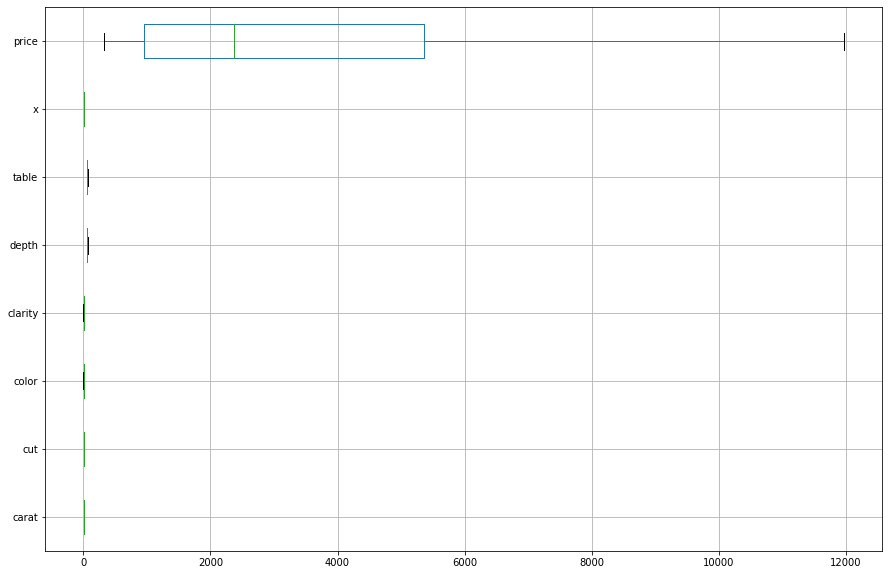

In [19]:
plt.figure(figsize =(15,10))
df.boxplot(vert =0)


# Linear Regession
# Train and test splitting

In [20]:
x = df.drop({'price'}, axis = 1)

In [21]:
y = df.pop('price')

In [40]:
x.head()

,carat,cut,color,clarity,depth,table,x
0,0.30,2.0,1.0,2.0,62.1,58.0,4.27
1,0.33,3.0,3.0,1.0,60.8,58.0,4.42
2,0.90,4.0,1.0,7.0,62.2,60.0,6.04
3,0.42,2.0,2.0,4.0,61.6,56.0,4.82
4,0.31,2.0,2.0,6.0,60.4,59.0,4.35


In [41]:
y.head()

0     499.0
1     984.0
2    6289.0
3    1082.0
4     779.0
Name: price, dtype: float64

### Spliting data

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size = 0.30, random_state = 1)

In [24]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
regression_model.coef_

array([9327.91402391,   43.45703766, -227.93500288,  250.56987312,
       -119.01559812,  -80.6528541 , -735.00769465])

In [26]:
regression_model.intercept_

12063.051852408937

In [27]:
regression_model.score(x_train, y_train)

0.9098183132486813

In [28]:
regression_model.score(x_test, y_test)

0.9067235018307639

In [29]:
print('train_score_70_30 : {0}, test_score_70_30 : {1}'.format(regression_model.score(x_train,y_train),regression_model.score(x_test,y_test)))

train_score_70_30 : 0.9098183132486813, test_score_70_30 : 0.9067235018307639


In [74]:
print("The intercept of the model is {}". format(regression_model.intercept_))

The intercept of the model is 12063.051852408937


In [73]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for carat is 9327.914023910382
The coefficient for cut is 43.45703766380346
The coefficient for color is -227.9350028828833
The coefficient for clarity is 250.56987312336395
The coefficient for depth is -119.0155981160656
The coefficient for table is -80.65285410204342
The coefficient for x is -735.0076946477071


# Stats Model 

### to check R square

In [49]:
df_train = pd.concat([x_train, y_train], axis = 1)

In [50]:
import statsmodels.formula.api as smf

In [51]:
df_train.head()

,carat,cut,color,clarity,depth,table,x,price
11687,0.41,2.0,5.0,7.0,62.3,56.0,4.77,1061.0
9728,1.71,2.0,6.0,2.0,62.8,57.0,7.58,6320.0
1936,0.33,1.0,2.0,2.0,61.8,62.0,4.40,536.0
26220,0.70,4.0,4.0,2.0,62.8,57.0,5.61,2214.0
18445,0.70,2.0,0.0,3.0,62.1,56.0,5.67,2575.0


In [52]:
lm1 = smf.ols(formula = "price ~ carat+cut+color+clarity+depth+table+x", data = df_train).fit()

In [53]:
lm1.params

Intercept    12063.051852
carat         9327.914024
cut             43.457038
color         -227.935003
clarity        250.569873
depth         -119.015598
table          -80.652854
x             -735.007695
dtype: float64

In [54]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 2.719e+04
Date:                Wed, 05 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:44:08   Log-Likelihood:            -1.5800e+05
No. Observations:               18876   AIC:                         3.160e+05
Df Residuals:                   18868   BIC:                         3.161e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.206e+04    575.859     20.948      0.0

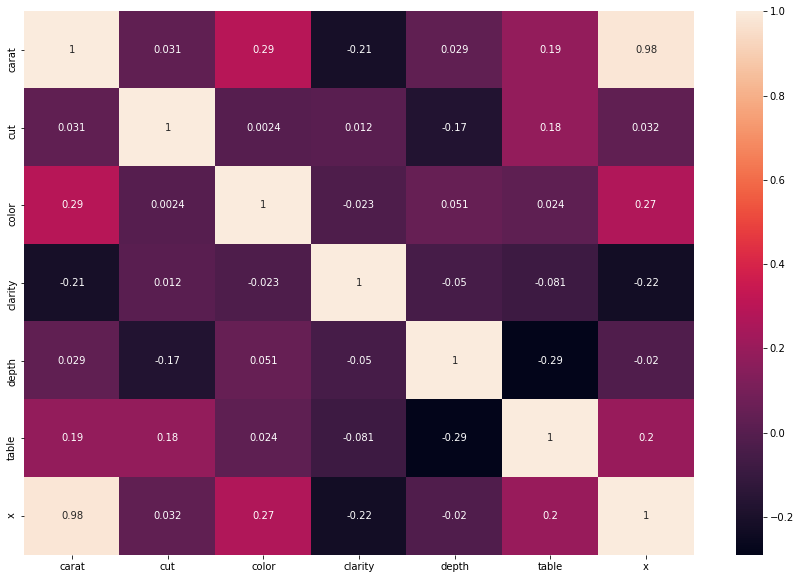

In [56]:
plt.figure(figsize = (15,10))
sns.heatmap(x.corr(), annot=True)    

In [87]:
y_test_predict = regression_model.predict(x_test)
mse = np.mean((y_test_predict-y_test)**2)

In [88]:
y_train_predict = regression_model.predict(x_train)
mse = np.mean((y_train_predict-y_train)**2)

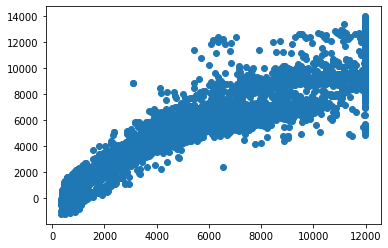

In [89]:
plt.scatter(y_test, y_test_predict)

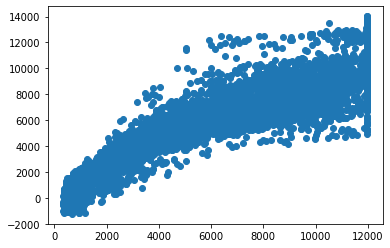

In [91]:
plt.scatter(y_train, y_train_predict)

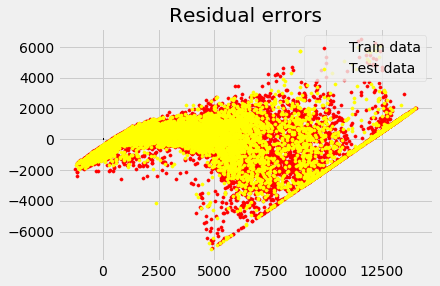

In [96]:
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data -
plt.scatter(regression_model.predict(x_train), regression_model.predict(x_train) - y_train, 
            color = "red", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(regression_model.predict(x_test), regression_model.predict(x_test) - y_test, 
            color = "yellow", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

In [107]:
y_train_predict=regression_model.predict(x_train)
mse_train= np.mean((y_train_predict-y_train)**2)
mse_train

1091104.4706023275

In [108]:
y_test_predict=regression_model.predict(x_test)
mse_test= np.mean((y_test_predict-y_test)**2)
mse_test

1112264.550438729

In [109]:
RMSE_train=np.sqrt(mse_train)
RMSE_train

1044.559462454066

In [110]:
RMSE_test=np.sqrt(mse_test)
RMSE_test

1054.639535784018

In [37]:
print('RSME_train score : 1044.559462454066' "     /     " 'RSME_tset score : 1054.639535784018')

RSME_train score : 1044.559462454066     /     RSME_tset score : 1054.639535784018
